# Email/SMS Spam Classifier

Import necessary libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


: 

Loading the dataset

In [2]:
df = pd.read_csv('updated_dataframe.csv')

In [3]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5660,spam,Mubarak ho! Aap hamari premium service ka free...
5661,spam,"Dear Customer, aap ko special cash prize PKR 1..."
5662,spam,Special Offer! Aapko free SIM card mil raha ha...
5663,spam,"Aap ko complimentary gift basket worth PKR 5,0..."


In [4]:
df.shape

(5665, 2)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5665 non-null   object
 1   text    5665 non-null   object
dtypes: object(2)
memory usage: 88.6+ KB


In [6]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5660,spam,Mubarak ho! Aap hamari premium service ka free...
5661,spam,"Dear Customer, aap ko special cash prize PKR 1..."
5662,spam,Special Offer! Aapko free SIM card mil raha ha...
5663,spam,"Aap ko complimentary gift basket worth PKR 5,0..."


Encoding the 'target' column ('ham' = 0 & 'spam' = 1)

In [7]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [8]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5660,1,Mubarak ho! Aap hamari premium service ka free...
5661,1,"Dear Customer, aap ko special cash prize PKR 1..."
5662,1,Special Offer! Aapko free SIM card mil raha ha...
5663,1,"Aap ko complimentary gift basket worth PKR 5,0..."


Checking for null values

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

Checking for duplicate rows

In [10]:
df.duplicated().sum()

406

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5259, 2)

## EDA & Visualizations

In [14]:
df['target'].value_counts()

target
0    4516
1     743
Name: count, dtype: int64

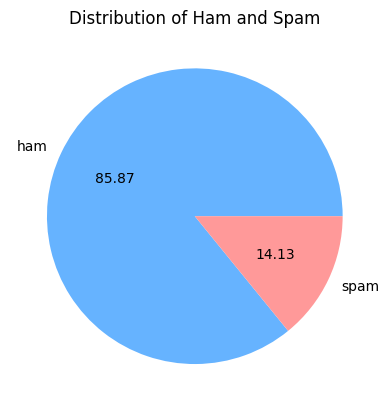

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

## Feature Engineering

Adding 'num_char', 'num_words' & 'num_sentences' as number of characters, words and sentences in the 'text' column

In [16]:
# Feature engineering
df['num_char'] = df['text'].apply(len)

import nltk
nltk.download('punkt')

df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5660,1,Mubarak ho! Aap hamari premium service ka free...,206,38,4
5661,1,"Dear Customer, aap ko special cash prize PKR 1...",211,41,3
5662,1,Special Offer! Aapko free SIM card mil raha ha...,192,41,3
5663,1,"Aap ko complimentary gift basket worth PKR 5,0...",191,37,3


In [18]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5259.000000,5259.000000,5259.000000
mean,80.637384,18.750523,1.989161
std,60.518128,13.648641,1.458594
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,120.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [19]:
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df['target']==1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,743.000000,743.000000,743.000000
mean,142.500673,28.637954,3.016151
std,46.509277,9.903688,1.482061
min,13.000000,2.000000,1.000000
25%,129.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.500000,4.000000
max,412.000000,85.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

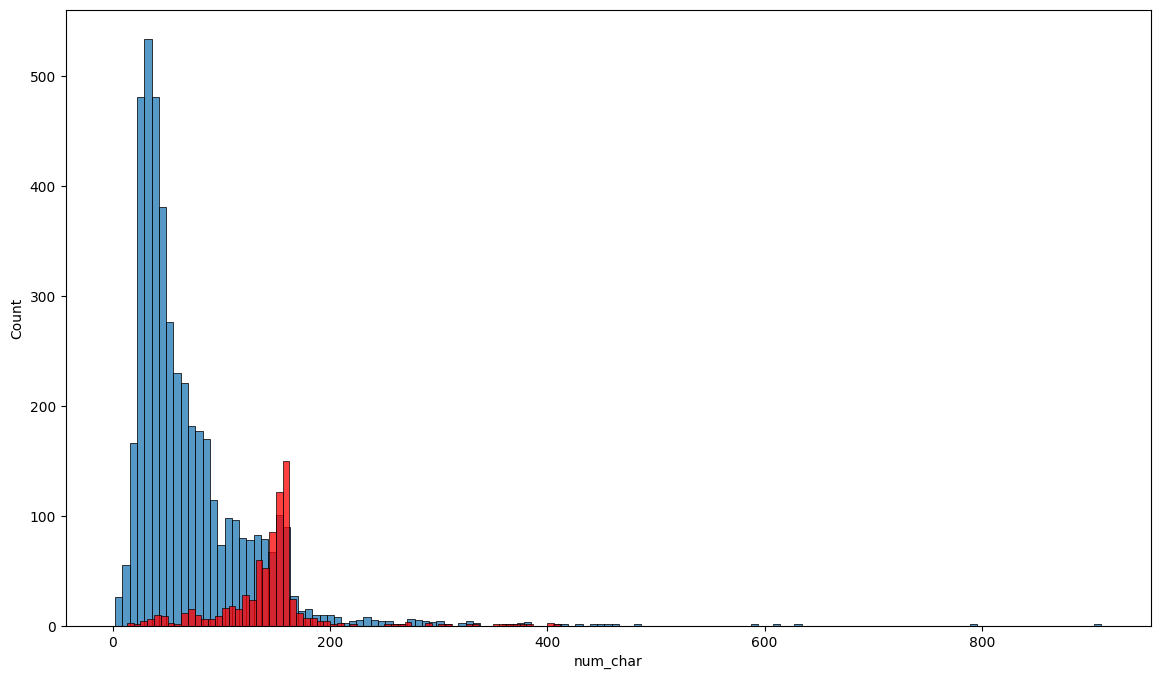

In [21]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='red')

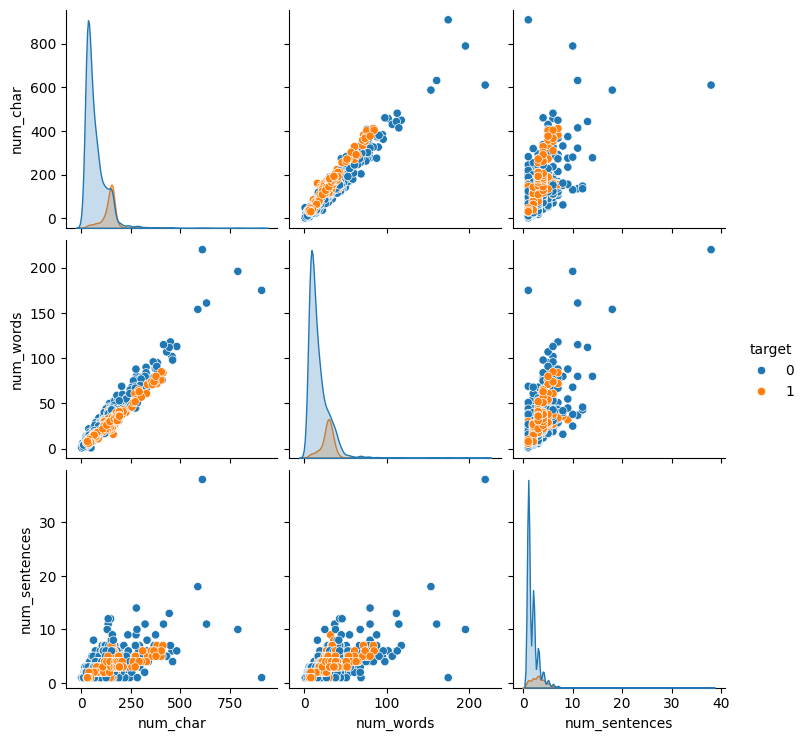

In [22]:
sns.pairplot(df, hue='target')

<Axes: >

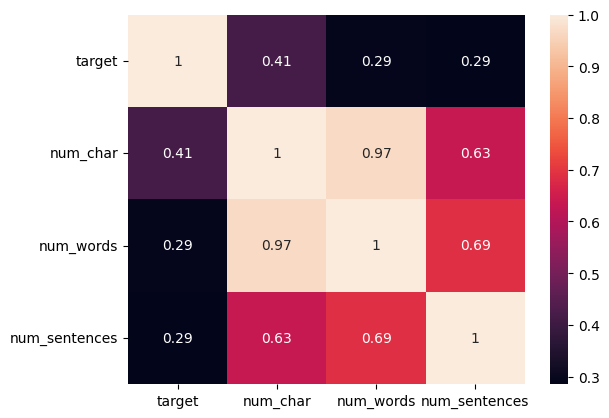

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data Preprocessing

Lower case

Tokenization(seperating one by one)

Removing special character

Removing stop words and punctuation

Stemming( eg: loving-> love etc)

In [24]:
# Text preprocessing function
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

df['transformed_text'] = df['text'].apply(transform_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5660,1,Mubarak ho! Aap hamari premium service ka free...,206,38,4,mubarak ho aap hamari premium servic ka free t...
5661,1,"Dear Customer, aap ko special cash prize PKR 1...",211,41,3,dear custom aap ko special cash prize pkr miln...
5662,1,Special Offer! Aapko free SIM card mil raha ha...,192,41,3,special offer aapko free sim card mil raha hai...
5663,1,"Aap ko complimentary gift basket worth PKR 5,0...",191,37,3,aap ko complimentari gift basket worth pkr mil...


## Wordcloud

In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, min_font_size=5, background_color='black')

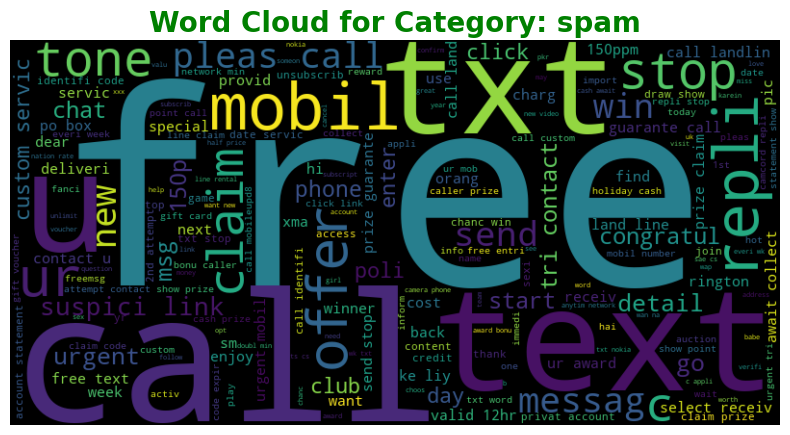

In [27]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: spam', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

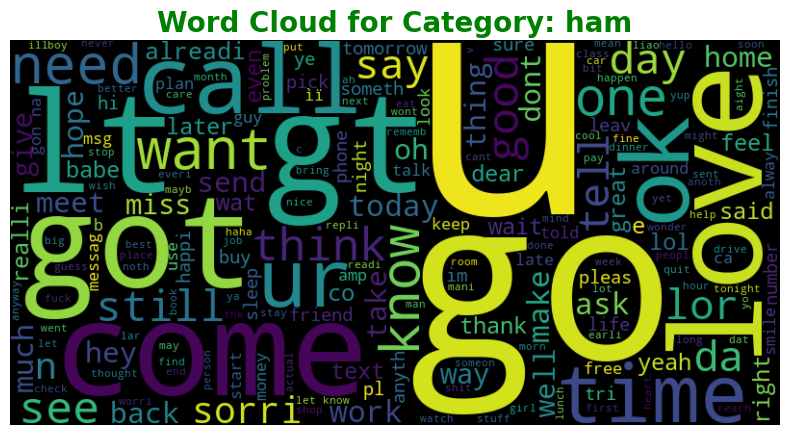

In [28]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear', cmap='viridis')
plt.title(f'Word Cloud for Category: ham', fontsize=20, fontweight='bold', color='green')
plt.axis('off')
plt.show()

In [29]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

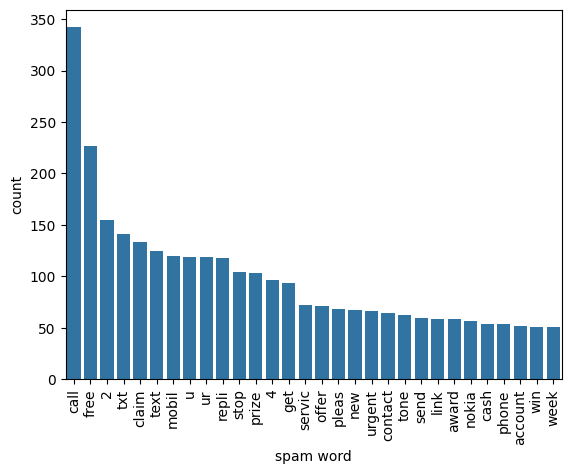

In [30]:
from collections import Counter

most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
sns.barplot(x='spam word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

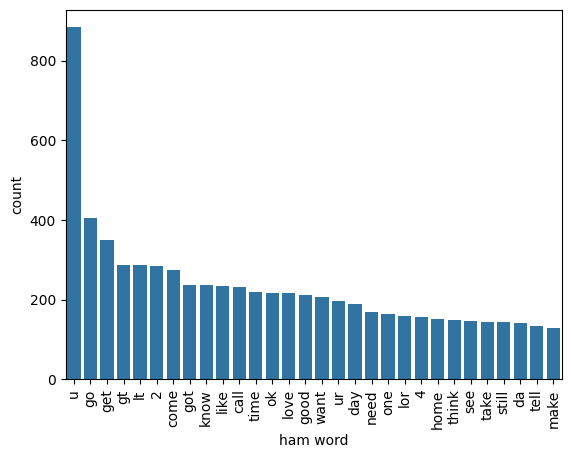

In [32]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
sns.barplot(x='ham word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
df['target'].value_counts()

target
0    4516
1     743
Name: count, dtype: int64

In [34]:
df

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5660,1,Mubarak ho! Aap hamari premium service ka free...,206,38,4,mubarak ho aap hamari premium servic ka free t...
5661,1,"Dear Customer, aap ko special cash prize PKR 1...",211,41,3,dear custom aap ko special cash prize pkr miln...
5662,1,Special Offer! Aapko free SIM card mil raha ha...,192,41,3,special offer aapko free sim card mil raha hai...
5663,1,"Aap ko complimentary gift basket worth PKR 5,0...",191,37,3,aap ko complimentari gift basket worth pkr mil...


## Balancing the Data by Over Sampling 

Increasing the numbers of spam messages as they are very less in quantity, and we require balanced dataset for better results.

In [35]:
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your DataFrame
# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

# Display the new class distribution
print(df_resampled['target'].value_counts())

target
0    4516
1    4516
Name: count, dtype: int64


In [36]:
df=df_resampled

## Model Building

In [37]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


In [38]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [39]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier

# Initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc
    # 'AdaBoost': abc,
    # 'BgC': bc,
    # 'ETC': etc,
    # 'GBDT': gbdt
    # 'xgb': xgb
}


In [40]:
# Function to train classifier
from sklearn.metrics import accuracy_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Train and evaluate classifiers
accuracy_scores = []

for name, clf in clfs.items():
    current_accuracy = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    accuracy_scores.append(current_accuracy)


For  SVC
Accuracy -  0.981737686773658
For  KN
Accuracy -  0.975650249031544
For  NB
Accuracy -  0.9546209186496957
For  DT
Accuracy -  0.8633093525179856
For  LR
Accuracy -  0.965688987271721
For  RF
Accuracy -  0.9977863862755949


## Selection of Model

In [41]:
# Create a dataframe to store performance
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores}).sort_values('Accuracy', ascending=False)
performance_df


,Algorithm,Accuracy
5,RF,0.997786
0,SVC,0.981738
1,KN,0.975650
4,LR,0.965689
2,NB,0.954621
3,DT,0.863309


## Saving the best model

In [42]:
# Save the best model (RFC in this case)
import joblib

best_model = rfc  # SVC model had the highest accuracy
joblib.dump(best_model, 'spam_classifier.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

## Checking the model

In [44]:
# Load the spam classifier model and TF-IDF vectorizer
import joblib
import nltk

spam_classifier = joblib.load('spam_classifier.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function (adjust based on your training preprocessing)
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return ' '.join(tokens)

# Function to classify a message
def classify_message(message):
    # Preprocess the message
    preprocessed_message = preprocess_text(message)

    # Vectorize the message
    vectorized_message = tfidf_vectorizer.transform([preprocessed_message])

    # Classify the message
    is_spam = spam_classifier.predict(vectorized_message)[0]

    # Return the result
    return "spam" if is_spam else "ham"

# Take an input message from the user
input_message = input("Enter a message to classify: ")

# Classify the input message
result = classify_message(input_message)

# Print the result
print(f"The message is classified as: {result}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter a message to classify:  hi


The message is classified as: ham
